In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configurar o estilo dos gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [3]:
# Carregar os dados
file_paths = [
    "featured/2000/vra_clean_with_features.csv",
    "featured/2001/vra_clean_with_features.csv",
    "featured/2002/vra_clean_with_features.csv"
]
df = pd.concat([pd.read_csv(fp, low_memory=False) for fp in file_paths], ignore_index=True)

In [4]:
# Convertendo as colunas de data e hora
df['dep_scheduled'] = pd.to_datetime(df['dep_scheduled'], errors='coerce')
df['dep_actual'] = pd.to_datetime(df['dep_actual'], errors='coerce')
df['arr_scheduled'] = pd.to_datetime(df['arr_scheduled'], errors='coerce')
df['arr_actual'] = pd.to_datetime(df['arr_actual'], errors='coerce')

In [5]:
# Calculando os atrasos em minutos
df['dep_delay_min'] = (df['dep_actual'] - df['dep_scheduled']).dt.total_seconds() / 60
df['arr_delay_min'] = (df['arr_actual'] - df['arr_scheduled']).dt.total_seconds() / 60

In [6]:
# Filtrando os voos com atraso na decolagem (dep_delay_min > 0)
df_delays = df[df['dep_delay_min'] > 0]


In [7]:
# 1. Aeroporto com mais atrasos no geral
airport_delays = df_delays.groupby('origin_icao').size().reset_index(name='num_delays')
airport_most_delays = airport_delays.sort_values(by='num_delays', ascending=False).head(1)
print("Aeroporto com mais atrasos no geral:")
print(airport_most_delays)

Aeroporto com mais atrasos no geral:
    origin_icao  num_delays
124        SBSP       54611


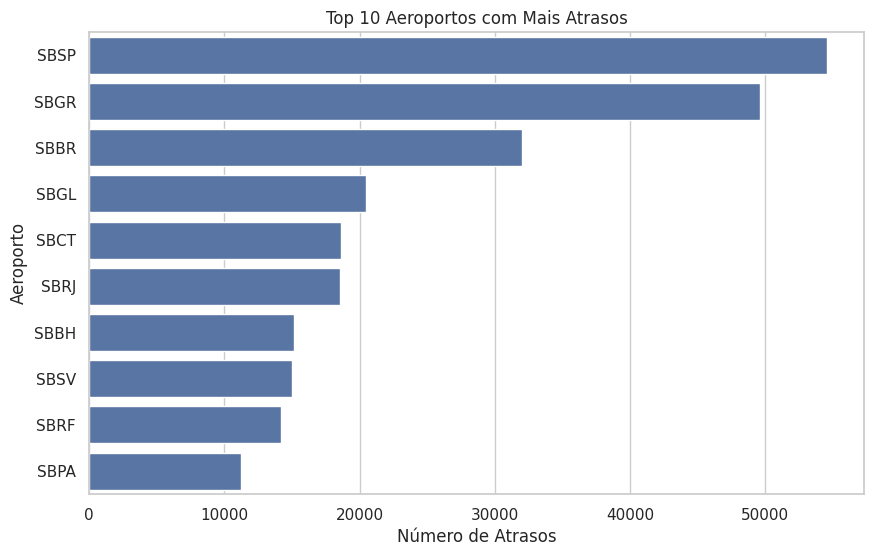

In [8]:
# Plotando o Aeroporto com mais atrasos
plt.figure(figsize=(10, 6))
sns.barplot(x='num_delays', y='origin_icao', data=airport_delays.sort_values(by='num_delays', ascending=False).head(10))
plt.title('Top 10 Aeroportos com Mais Atrasos')
plt.xlabel('Número de Atrasos')
plt.ylabel('Aeroporto')
plt.show()

In [9]:
# 2. Aeroporto que aumentou ou diminuiu o número de atrasos (por ano)
airport_year_delays = df_delays.groupby(['origin_icao', 'year']).size().reset_index(name='num_delays')
airport_year_delays['delay_diff'] = airport_year_delays.groupby('origin_icao')['num_delays'].diff()

In [10]:
# Aeroportos com aumento ou diminuição no número de atrasos
increased_delays_airports = airport_year_delays[airport_year_delays['delay_diff'] > 0]
decreased_delays_airports = airport_year_delays[airport_year_delays['delay_diff'] < 0]


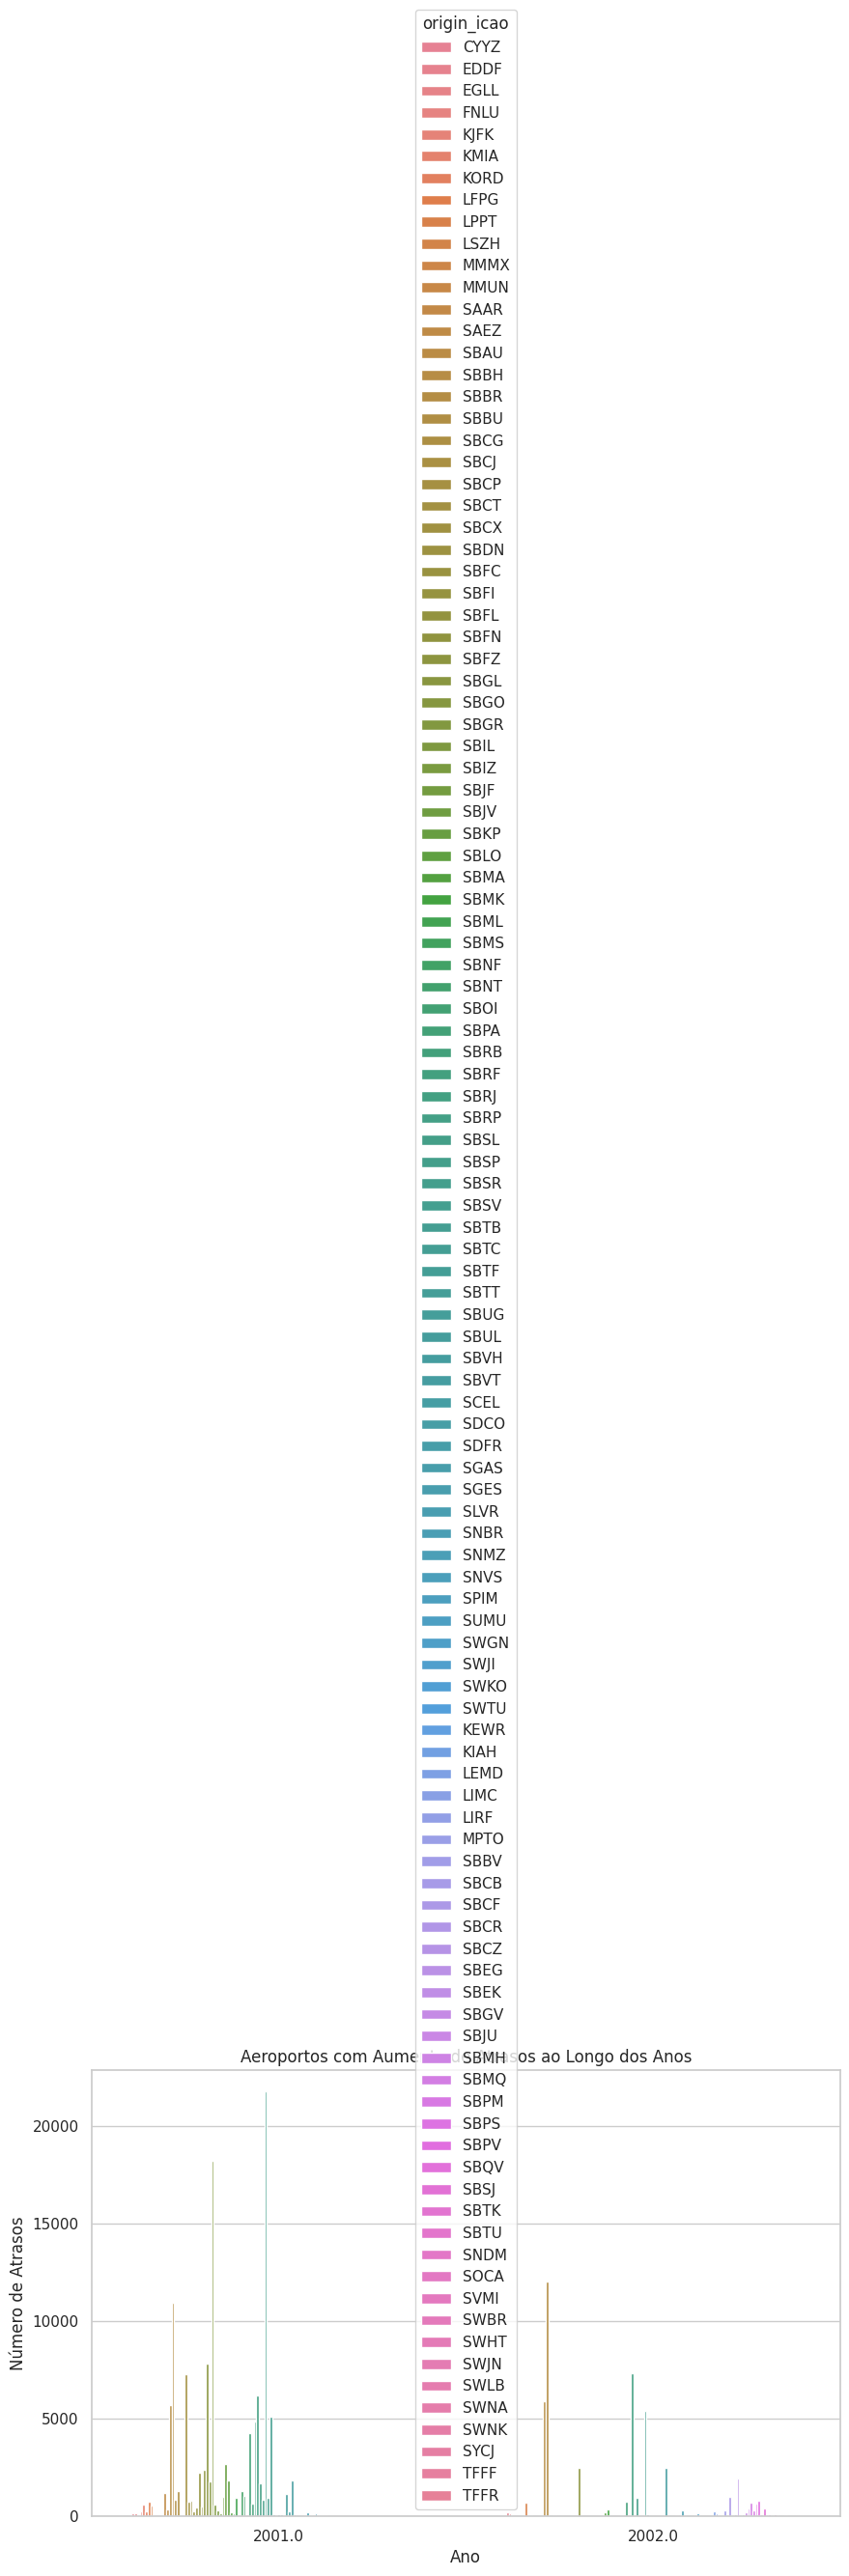

In [11]:
# Plotando aeroportos que aumentaram os atrasos
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='num_delays', hue='origin_icao', data=increased_delays_airports)
plt.title('Aeroportos com Aumento de Atrasos ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Atrasos')
plt.show()

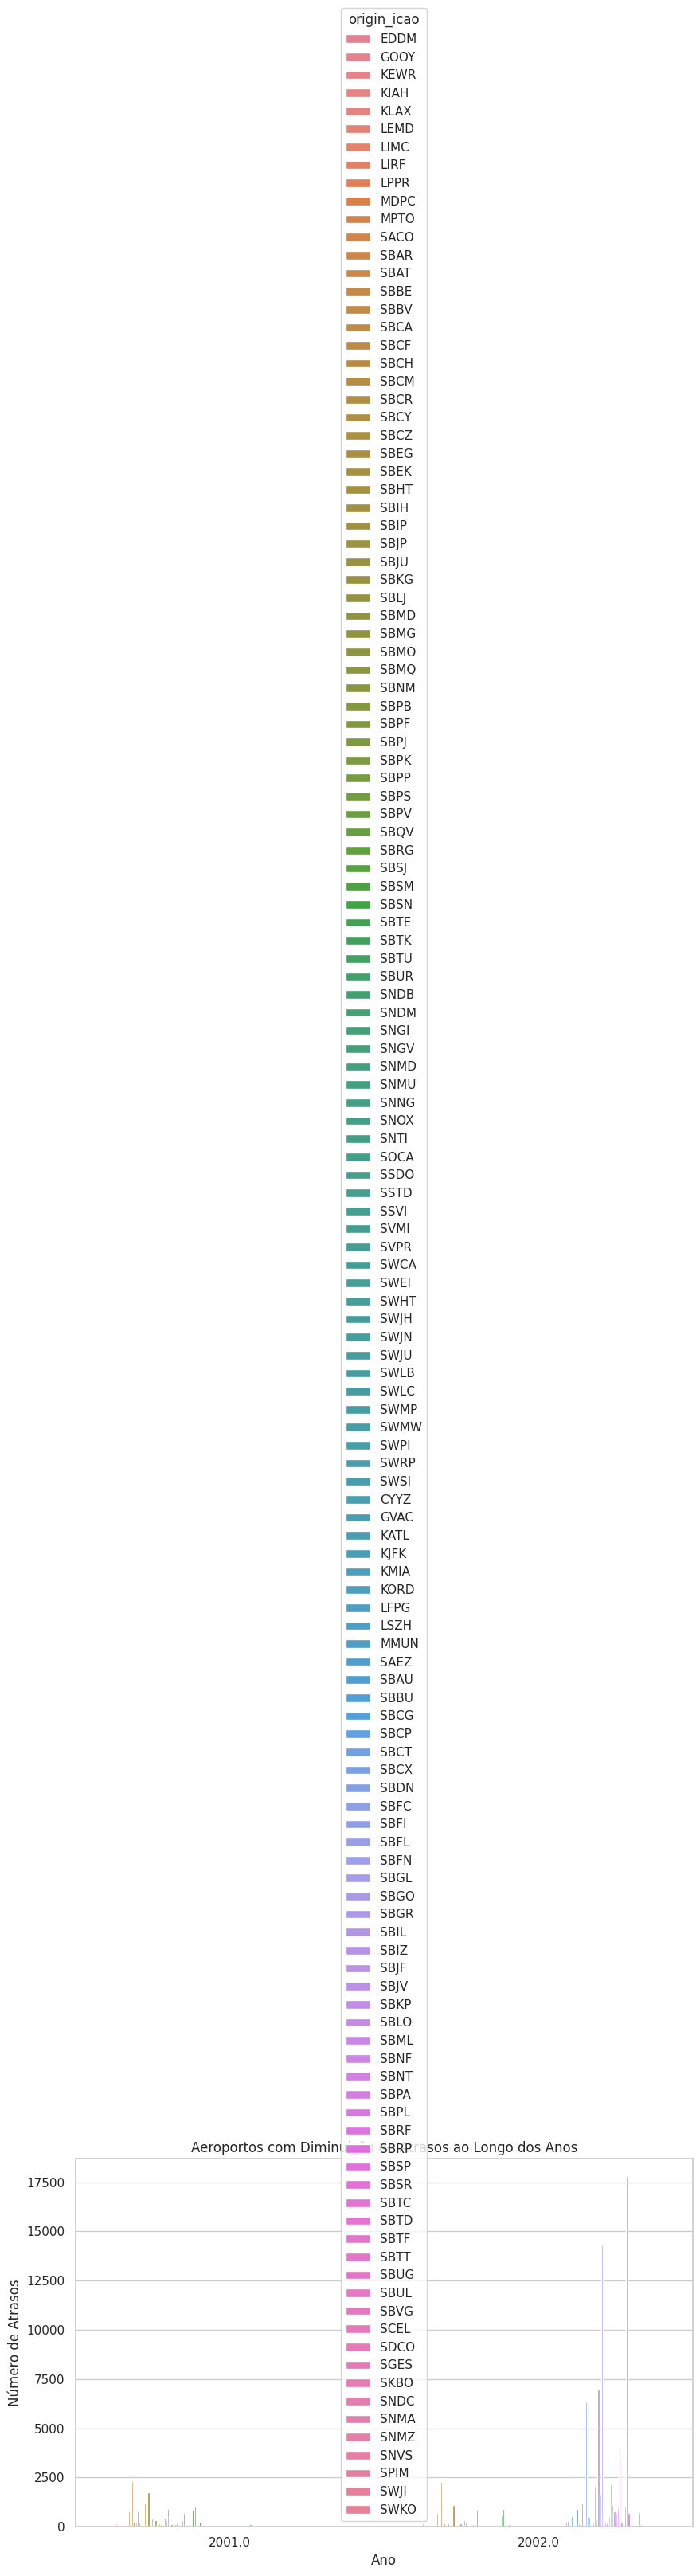

In [12]:
# Plotando aeroportos que diminuíram os atrasos
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='num_delays', hue='origin_icao', data=decreased_delays_airports)
plt.title('Aeroportos com Diminuição de Atrasos ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Atrasos')
plt.show()

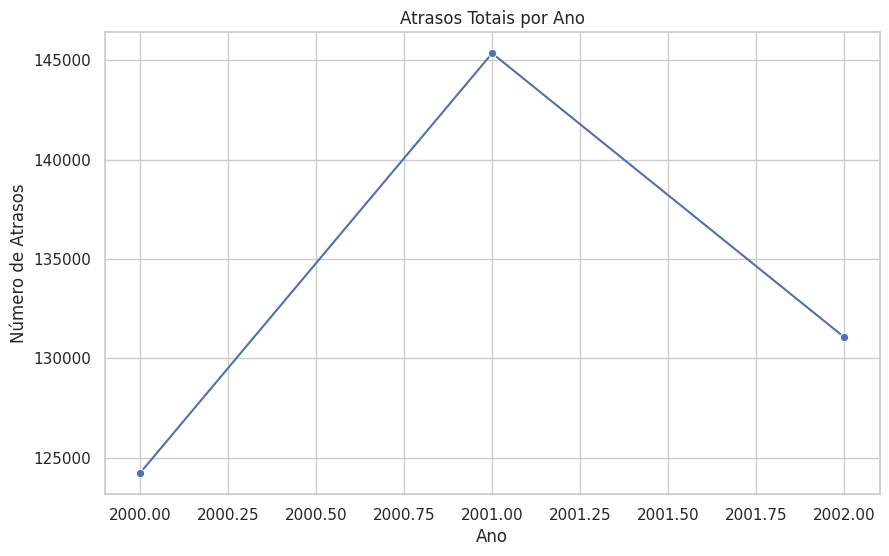

In [13]:
# 3. Atrasos aumentaram ou diminuíram no período (por ano)
yearly_delays = df_delays.groupby('year').size().reset_index(name='num_delays')
yearly_delays['delay_diff'] = yearly_delays['num_delays'].diff()

# Plotando os atrasos totais por ano
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='num_delays', data=yearly_delays, marker='o')
plt.title('Atrasos Totais por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Atrasos')
plt.show()


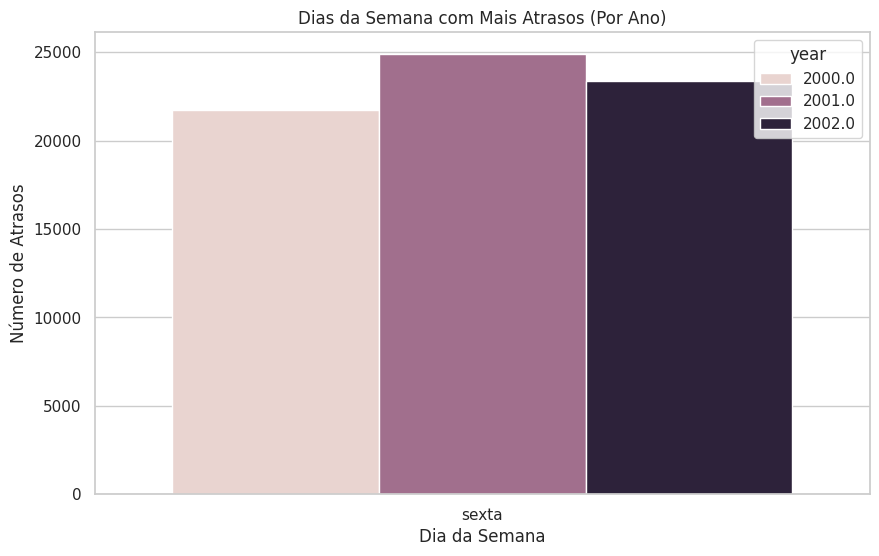

In [14]:
# 4. Dias da semana com mais atrasos (a cada ano)
weekday_delays = df_delays.groupby(['year', 'weekday']).size().reset_index(name='num_delays')
weekday_delays_max = weekday_delays.loc[weekday_delays.groupby('year')['num_delays'].idxmax()]

# Plotando os dias da semana com mais atrasos
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='num_delays', hue='year', data=weekday_delays_max)
plt.title('Dias da Semana com Mais Atrasos (Por Ano)')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Atrasos')
plt.show()

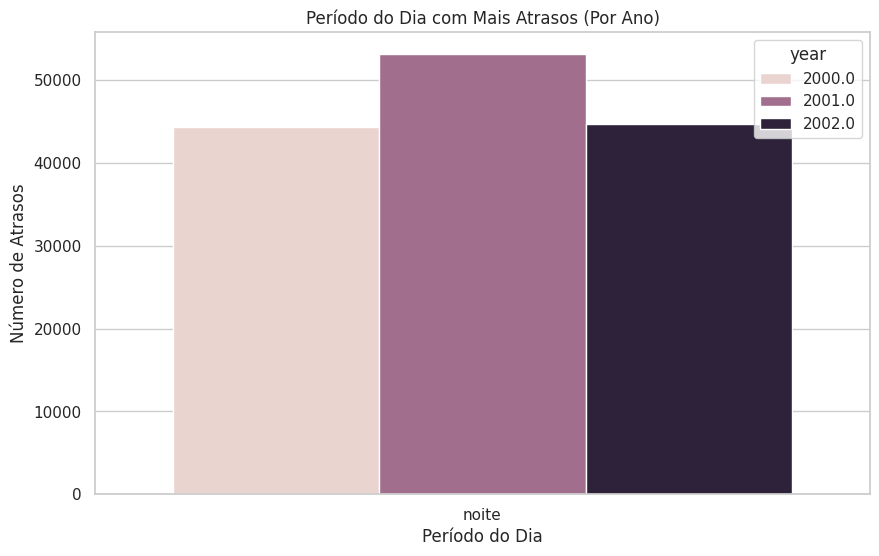

In [15]:
# 5. Período do dia com mais atrasos (a cada ano)
periodo_dia_delays = df_delays.groupby(['year', 'periodo_dia']).size().reset_index(name='num_delays')
periodo_dia_delays_max = periodo_dia_delays.loc[periodo_dia_delays.groupby('year')['num_delays'].idxmax()]

# Plotando os períodos do dia com mais atrasos
plt.figure(figsize=(10, 6))
sns.barplot(x='periodo_dia', y='num_delays', hue='year', data=periodo_dia_delays_max)
plt.title('Período do Dia com Mais Atrasos (Por Ano)')
plt.xlabel('Período do Dia')
plt.ylabel('Número de Atrasos')
plt.show()

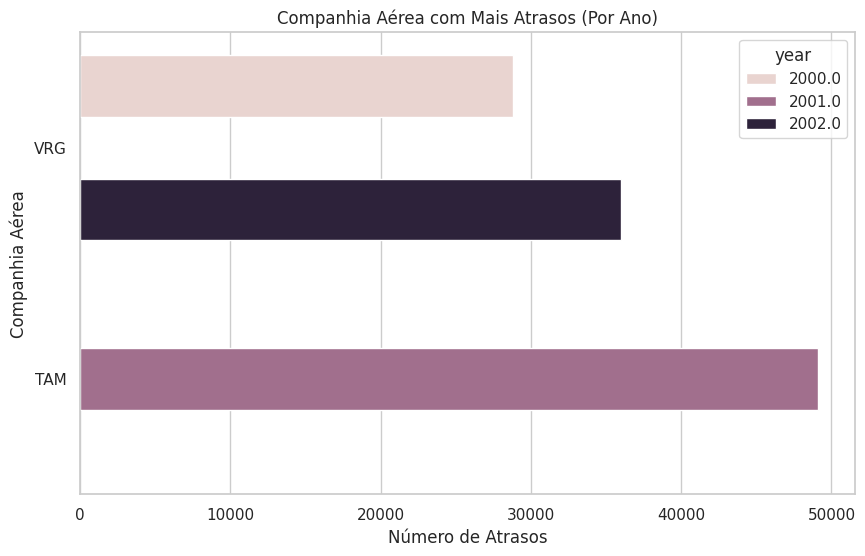

In [16]:
# 6. Companhia que mais atrasa (a cada ano)
airline_delays = df_delays.groupby(['year', 'airline_icao']).size().reset_index(name='num_delays')
airline_max_delays = airline_delays.loc[airline_delays.groupby('year')['num_delays'].idxmax()]

# Plotando a companhia aérea com mais atrasos
plt.figure(figsize=(10, 6))
sns.barplot(x='num_delays', y='airline_icao', hue='year', data=airline_max_delays)
plt.title('Companhia Aérea com Mais Atrasos (Por Ano)')
plt.xlabel('Número de Atrasos')
plt.ylabel('Companhia Aérea')
plt.show()